In [1]:
# PLOTS THE NIRISS BACKGROUND MODELS FROM EACH PIPELINE
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table

sys.path.append('./scripts')
from utils import load_plt_params, pipeline_dictionary, convolve_model

# set the matplotlib parameters
pltparams=load_plt_params()

COLOR = pltparams[pltparams['name']=='text.color']['value'][0]

pipeline_dict = pipeline_dictionary()

plt.rcParams['font.size'] = 10

figsize = (7.20472, 7)

sys.path.append('/Users/belugawhale/Documents/GitHub/nirhiss/')
from src.nirhiss.utils import get_MAD_sigma

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_7070/260249288.py:108: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure5.jpg',


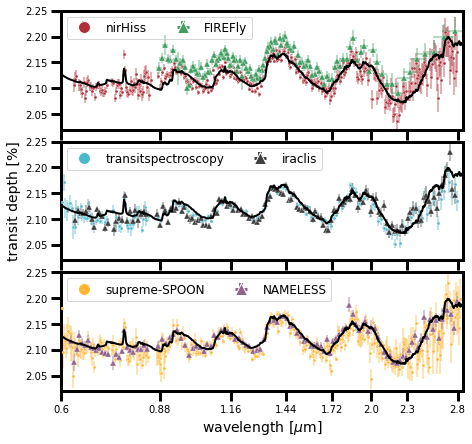

In [4]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Creates the figure environment
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=figsize,
                                    sharex=True, sharey=True)
fig.set_facecolor('w')

cutends = 15
for a in [ax1, ax2, ax3]:
    a.plot(ref[0][cutends:-cutends], ref[1][cutends:-cutends]*1e2,
            lw=2,c='k', zorder=100)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

# Set alpha value, zorder, and marker shape for each plotted spectrum
alpha = np.full(len(pipelineorder), 0.6)
zorder = [5, 4, 3, 5, 4 , 3]
shapes = ['o', '^', 'o', '^', 'o', '^']

for i in range(len(pipelineorder)):
    fn = pipeline_dict[pipelineorder[i]]['filename']
    tab = Table.read(os.path.join('./data/ts', fn), format='csv', comment='#')

    color = pipeline_dict[pipelineorder[i]]['color']
    label = pipeline_dict[pipelineorder[i]]['name']

    for order in [1,2]:

        if order==2:
            q = (tab['quality'] == 0) & (tab['order'] == order)
            label=''
        else:
            q = tab['wave'] > 0.87
            label=label

        if i < 2:
            a = ax1
        elif i >= 2 and i < 4:
            a = ax2
        else:
            a = ax3

        if shapes[i] == '^':
            ms = 6
        else:
            ms = 3

        a.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   yerr=tab['dppm_err'][q]/1e4,
                   xerr=tab['wave_error'][q],
                   markeredgecolor='w', color=color,
                   ecolor=color,
                   linestyle='', marker=shapes[i], ms=ms,
                   alpha=0.5, markeredgewidth=0.3)

        a.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   markeredgecolor='w', color=color,
                   ecolor=color, markeredgewidth=0.3, alpha=1,
                   linestyle='', marker=shapes[i], ms=ms, zorder=10)


axes = [ax1, ax1, ax2, ax2, ax3, ax3]
for i in range(len(pipelineorder)):
    color = pipeline_dict[pipelineorder[i]]['color']
    axes[i].errorbar(tab['wave'][q], tab['dppm'][q]/1000,
                     yerr=tab['dppm_err'][q]/1000,
                     xerr=np.full(len(tab[q]),0.002),
                     markeredgecolor='w', color=color,
                     ecolor=color,
                     linestyle='', marker=shapes[i],
                     label=pipeline_dict[pipelineorder[i]]['name'],
                     ms=12, lw=4, markeredgewidth=1)


# Sets the x and y labels
plt.xlabel('wavelength [$\mu$m]', fontsize=14)
#ax1.set_ylabel('transit depth [%]')
ax2.set_ylabel('transit depth [%]', fontsize=14)
#ax3.set_ylabel('transit depth [%]')


# Sets the x-limit, x-scale, and x-ticks
plt.xscale('log')
plt.xlim(0.6,2.86)
xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
xticks = np.round(xticks,2)
plt.xticks(xticks, labels=np.round(xticks,2))

# Sets the y-limit
plt.ylim(2.02,2.25)
plt.yticks(np.arange(2.05,2.3,0.05))

# Creates the legends for each subplot
for a in [ax1, ax2, ax3]:
    leg = a.legend(loc="upper left",
                     ncol=2, #mode="expand", borderaxespad=0.,
                     fontsize=12)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)

plt.subplots_adjust(hspace=0.1)
plt.minorticks_off()

plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure5.jpg',
            dpi=300, rasterize=True,
            #transparent=True,
            bbox_inches='tight')
